In [4]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from scipy.interpolate import spline
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
df = pd.read_csv('Data.csv')
df['Customer placed order datetime'] = '2018-01-' + df['Customer placed order datetime']
df['Placed order with restaurant datetime'] = '2018-01-' + df['Placed order with restaurant datetime']
df['Driver at restaurant datetime'] = '2018-01-' + df['Driver at restaurant datetime']
df['Delivered to consumer datetime'] = '2018-01-' + df['Delivered to consumer datetime']
for n in ['Customer placed order datetime', 'Driver at restaurant datetime', \
          'Delivered to consumer datetime', 'Placed order with restaurant datetime']:
    df[n] = pd.to_datetime(df[n], errors='coerce')
df['Hour_ordered'] = (df['Customer placed order datetime'] - datetime.timedelta(hours=7)).dt.hour


NameError: name 'datetime' is not defined

In [5]:
df['Time_Cust_to_Rest'] = df['Placed order with restaurant datetime'] - df['Customer placed order datetime'] 
df['Time_Rest_to_Dr'] = df['Driver at restaurant datetime'] - df['Placed order with restaurant datetime'] 
df['Time_Dr_to_Cust'] = df['Delivered to consumer datetime'] - df['Driver at restaurant datetime'] 
df['Total_time_sum'] = df['Time_Cust_to_Rest'] + df['Time_Rest_to_Dr'] + df['Time_Dr_to_Cust']
df['Total_time'] = df['Delivered to consumer datetime'] - df['Placed order with restaurant datetime']
df['Customer_to_driver'] = df['Driver at restaurant datetime'] - df['Customer placed order datetime']

for n in ['Time_Cust_to_Rest','Time_Rest_to_Dr', \
          'Time_Dr_to_Cust', 'Total_time', 'Total_time_sum', 'Customer_to_driver']:
    df[n] = round(df[n] / pd.Timedelta(minutes=1), 0)

df = df[df['Total_time'] > 0]
df.head()

,Customer placed order datetime,Placed order with restaurant datetime,Driver at restaurant datetime,Delivered to consumer datetime,Driver ID,Restaurant ID,Consumer ID,Is New,Delivery Region,Is ASAP,Order total,Amount of discount,Amount of tip,Refunded amount,Time_Cust_to_Rest,Time_Rest_to_Dr,Time_Dr_to_Cust,Total_time_sum,Total_time,Customer_to_driver
0,2018-01-14 20:27:45,2018-01-14 20:29:41,2018-01-14 20:39:32,2018-01-14 20:52:03,86,12,5,False,Palo Alto,True,20.45,20.45,3.07,0.0,2.0,10.0,13.0,24.0,22.0,12.0
1,2018-01-07 20:16:28,2018-01-07 20:17:32,2018-01-07 20:36:00,2018-01-07 20:49:02,325,66,5,False,Palo Alto,True,40.62,40.62,3.73,0.0,1.0,18.0,13.0,33.0,32.0,20.0
2,2018-01-13 19:35:09,2018-01-13 19:39:26,2018-01-13 20:28:16,2018-01-13 20:52:44,200,124,5,False,Palo Alto,True,37.78,37.78,1.89,0.0,4.0,49.0,24.0,78.0,73.0,53.0
3,2018-01-22 19:47:53,2018-01-22 19:56:08,2018-01-22 20:01:20,2018-01-22 20:18:01,154,5,14,False,Palo Alto,True,39.66,0.00,1.98,0.0,8.0,5.0,17.0,30.0,22.0,13.0
4,2018-01-03 19:01:52,2018-01-03 19:09:08,2018-01-03 19:36:20,2018-01-03 19:45:26,332,9,14,False,Palo Alto,True,39.66,0.00,5.95,0.0,7.0,27.0,9.0,44.0,36.0,34.0


Text(0.5,0,'Total delivery time, mins')

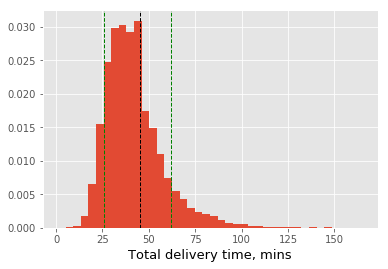

In [6]:
Total_above_zero = df['Total_time'][df['Total_time']>0]
Total_plot = Total_above_zero[df['Total_time']<175]
plt.hist(Total_plot, bins = 40, density=True)
plt.axvline(Total_above_zero.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(Total_above_zero, 10), color='g', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(Total_above_zero, 90), color='g', linestyle='dashed', linewidth=1)
plt.xlabel('Total delivery time, mins', fontsize = 13, color = "Black")


In [7]:
Total_above_zero.describe()

count    17996.000000
mean        45.168426
std        321.377510
min          1.000000
25%         31.000000
50%         39.000000
75%         50.000000
max      42990.000000
Name: Total_time, dtype: float64

In [ ]:
total_P90 = np.percentile(Total_above_zero, 90)
Total_above_P90 = Total_above_zero[Total_above_zero > total_P90]
Total_above_P90.count()/Total_above_zero.count()
# 10% of total time (above zero) is more than P90 (61 min) - need to work on reducing the time

In [ ]:
Total_above_p90_df = df[df['Total_time'] > total_P90]
a  = Total_above_p90_df[Total_above_p90_df['Time_Cust_to_Rest'] > 0][Total_above_p90_df['Time_Rest_to_Dr'] > 0][Total_above_p90_df['Time_Dr_to_Cust']> 0]
a[['Time_Cust_to_Rest','Time_Rest_to_Dr', 'Time_Dr_to_Cust']] .describe().drop('count')

# It takes long time to find the driver! Placing the order with restaurant should take less than 5 mins. Delivery time should be reduced to 45 mins to hour.

In [ ]:
x = df[df['Total_time']>0][df['Total_time']<150]
fig = plt.figure(figsize=(20, 10))
plt.scatter(x['Total_time'], x['Hour_ordered'], alpha=0.3)
plt.xlabel('Total delivery, mins', fontsize = 13, color = "Black")
plt.ylabel('Hour of the day, PDT', fontsize = 13, color = "Black")
plt.xlim((0, None))
plt.ylim((-1, None))
# Lunch time and Diner time - Delivery takes longer

In [ ]:
def p90(x):
    return np.nanpercentile(x, 90)

def fraction_above1hr(x):
    return (x > 60).mean()

y = df[df['Total_time']>0]
df_hour_time_data = y[['Hour_ordered', 'Total_time', 'Customer_to_driver']]
b = df_hour_time_data.groupby(by='Hour_ordered').agg({'Total_time': ['mean', 'count', p90, fraction_above1hr]})
b
#breakfast need to be delivered faster

In [ ]:
new_cust = df['Is New'][df['Is New'] == True]
all_cust = df['Is New']
new_cust.count(), all_cust.count(), new_cust.count()/all_cust.count()

#20% are new customers, need a way to retain the customers

In [ ]:
plt.hist(df['Order total'][df['Order total']<300], bins = 40)
plt.axvline(np.percentile(df['Order total'], 50), color='g', linestyle='dashed', linewidth=1)
plt.xlim((0, 300))
plt.figure()
df['order_minus_discounts'] = df['Order total'] - df['Amount of discount'] - df['Refunded amount']
plt.hist(df['order_minus_discounts'][df['order_minus_discounts']<300], bins = 40)
plt.axvline(np.percentile(df['order_minus_discounts'], 50), color='g', linestyle='dashed', linewidth=1)
plt.xlim((0, None))

In [ ]:
df['Order total'].describe()

In [ ]:
df['order_minus_discounts'].describe()

In [8]:
df['Amount of tip'].describe()

count    17996.000000
mean         3.474255
std          3.613268
min          0.000000
25%          1.400000
50%          2.550000
75%          4.450000
max        120.300000
Name: Amount of tip, dtype: float64

Text(0,0.5,'Delivery time')

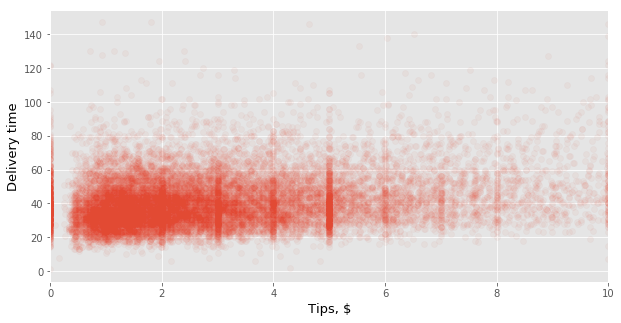

In [23]:
x = df[df['Total_time']>0][df['Total_time']<150]
fig = plt.figure(figsize=(10, 5))

plt.scatter(x['Amount of tip'], x['Total_time'], alpha=0.05)
#plt.xlabel('Total delivery, mins', fontsize = 13, color = "Black")
#plt.ylabel('Hour of the day, PDT', fontsize = 13, color = "Black")
plt.xlim((0, 10))
#plt.ylim((-1, 30))
plt.xlabel('Tips, $', fontsize = 13, color = "Black")
plt.ylabel('Delivery time', fontsize = 13, color = "Black")

In [11]:
x['Amount of tip'].describe()

count    17966.000000
mean         3.448121
std          3.413661
min          0.000000
25%          1.400000
50%          2.550000
75%          4.440000
max         75.900000
Name: Amount of tip, dtype: float64